## Prepare funtions, libraries for report and metrics

In [379]:
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor as gbr


def get_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = get_rmse(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')
    return [mae, mse, rmse, r2_square]


def print_evaluate_r_square_mse_mae(X_test, y_test, gbr_y_pred):
    r_squared = gbr.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, gbr_y_pred)
    mae = metrics.mean_absolute_error(y_test, gbr_y_pred)
    print(f"R-squared value of GradientBoostingRegressor: {r_squared}")
    print(f"The mean squared error of GradientBoostingRegressor: {mse}")
    print(f"The mean absoluate error of GradientBoostingRegressor: {mae}")
    return [r_squared, mse, mae]


def show_df(
    title: str,
    columns: List[str],
    rows: List[list],
    label_x: str = "Metrics",
    label_y: str = "Value",
):
    width = 0.3
    x = np.arange(len(columns))
    fig, ax = plt.subplots(figsize=(10, 6))
    labels = ["Avocado"]

    rects1 = ax.bar(x, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x - width/2, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x + width/2, rows[1], width, label=labels[1])
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend(loc='upper left')

## Prepare DataFrame

In [380]:
df = pd.read_csv("FinalHW.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [381]:
df.shape

(18249, 14)

In [382]:

df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
TotalVolume     0
4046            0
4225            0
4770            0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [383]:
y = df.iloc[:,2]
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [384]:
df.drop(['4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'AveragePrice'], axis=1, inplace=True)
df.head()

,Unnamed: 0,Date,TotalVolume,TotalBags,type,year,region
0,0,2015-12-27,64236.62,8696.87,conventional,2015,Albany
1,1,2015-12-20,54876.98,9505.56,conventional,2015,Albany
2,2,2015-12-13,118220.22,8145.35,conventional,2015,Albany
3,3,2015-12-06,78992.15,5811.16,conventional,2015,Albany
4,4,2015-11-29,51039.60,6183.95,conventional,2015,Albany


In [385]:
type(df['Date'][0])

str

In [386]:
df['Date'] = pd.to_datetime(df['Date'])

In [387]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [388]:
df['Date'][:5]

/tmp/ipykernel_24965/1458909631.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['Date'][:5]


0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
Name: Date, dtype: datetime64[ns]

In [389]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [390]:
type(df['Date'])

pandas.core.series.Series

In [391]:
df.shape

(18246, 7)

In [392]:
list_months = []
indexes = df.index
for i in indexes:
    list_months.append(df['Date'][i].month)
df['month'] = list_months

In [393]:
df.drop(['Date', 'Unnamed: 0'], axis=1, inplace=True)

,TotalVolume,TotalBags,type,year,region,month
0,64236.62,8696.87,conventional,2015,Albany,12
1,54876.98,9505.56,conventional,2015,Albany,12
2,118220.22,8145.35,conventional,2015,Albany,12
3,78992.15,5811.16,conventional,2015,Albany,12
4,51039.60,6183.95,conventional,2015,Albany,11


In [394]:

df['type'] = np.where(df['type']=="conventional", 0, 1)
df.head()

,TotalVolume,TotalBags,type,year,region,month
0,64236.62,8696.87,0,2015,Albany,12
1,54876.98,9505.56,0,2015,Albany,12
2,118220.22,8145.35,0,2015,Albany,12
3,78992.15,5811.16,0,2015,Albany,12
4,51039.60,6183.95,0,2015,Albany,11


In [395]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [396]:
df['region'].value_counts()

Albany                 338
NewYork                338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
Northeast              338
NewOrleansMobile       338
GrandRapids            338
BaltimoreWashington    338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
D

In [397]:
df.drop(['region'], axis=1, inplace=True)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18246 entries, 0 to 18248
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TotalVolume  18246 non-null  float64
 1   TotalBags    18246 non-null  float64
 2   type         18246 non-null  int64  
 3   year         18246 non-null  int64  
 4   month        18246 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


In [399]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df, y,test_size=0.2,random_state=42)

## Check by LinearRegression

In [400]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


LinearRegression_Yury = print_evaluate(y_test, y_pred)

MAE: 0.23852106484682636
MSE: 0.09393311599358266
RMSE: 0.30648509913792327
R2 Square 0.3965486830253393
______


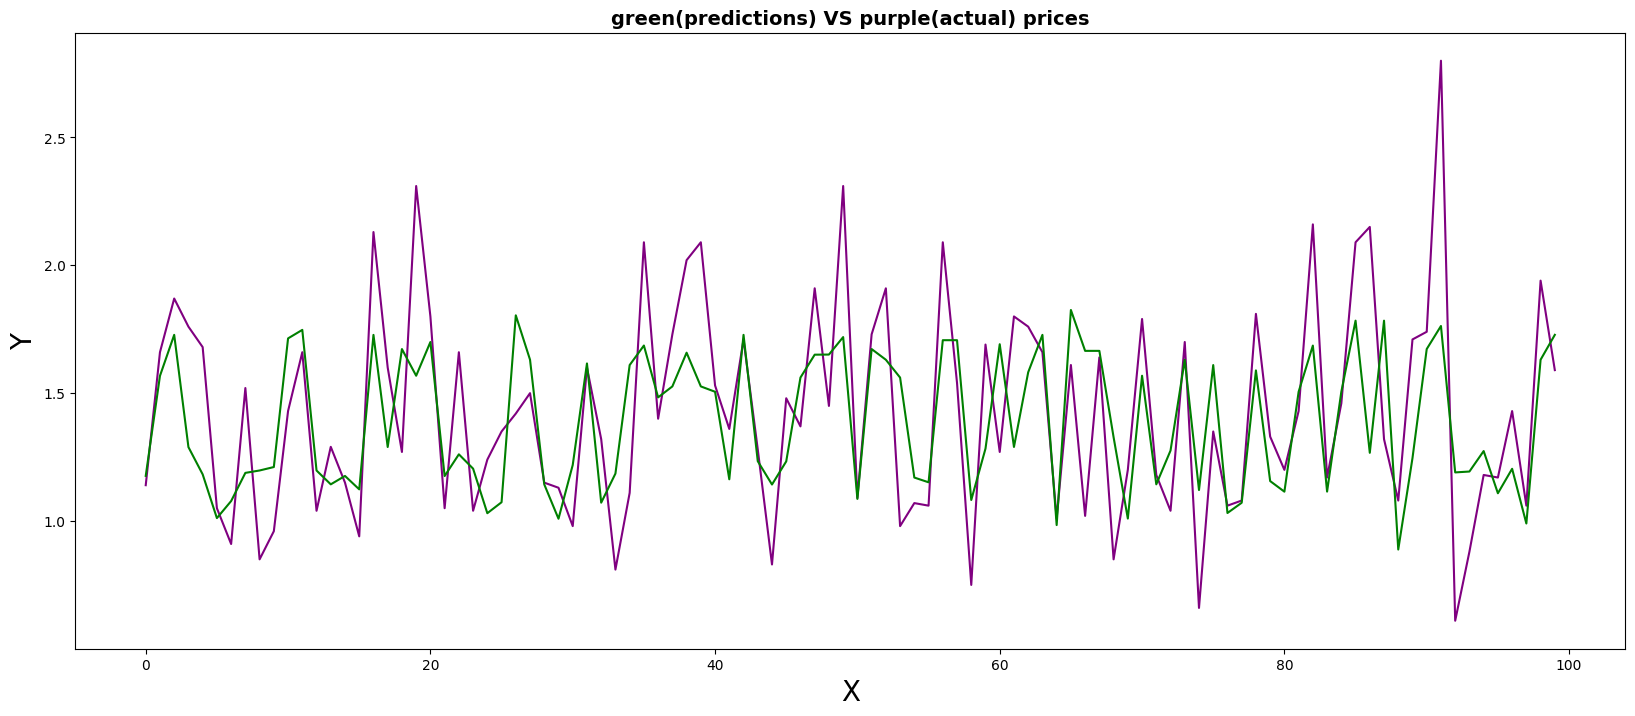

In [401]:
plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("green(predictions) VS purple(actual) prices", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

## Check by GradientBoostingRegressor

In [402]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_pred = gbr.predict(X_test)

GradientBoostingRegressor_Yury = print_evaluate_r_square_mse_mae(X_test, y_test, gbr_y_pred)


R-squared value of GradientBoostingRegressor: 0.5871979048169458
The mean squared error of GradientBoostingRegressor: 0.06425669477965859
The mean absoluate error of GradientBoostingRegressor: 0.1936308363594666


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

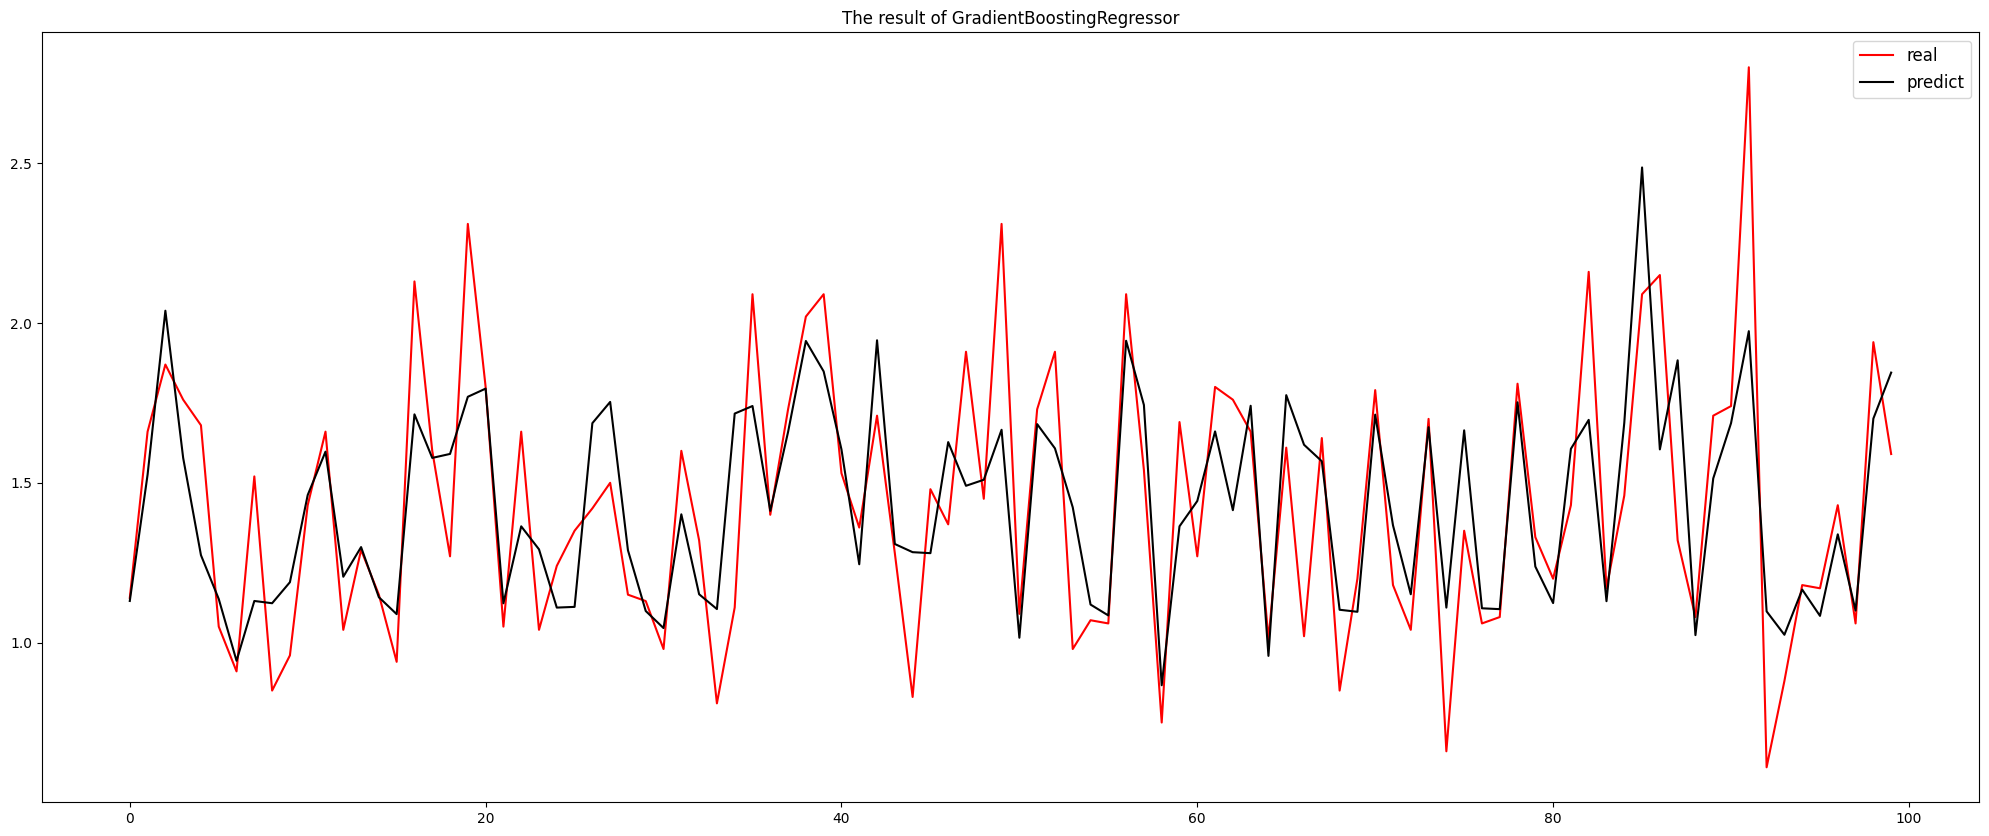

In [403]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='red')
plt.plot(gbr_y_pred[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

## Check by RandomForestRegressor with scaling

#### Test set

In [404]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [405]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,y_train)

rfr_y_pred = rfr.predict(X_test)

test = print_evaluate_r_square_mse_mae(X_test, y_test, rfr_y_pred)

R-squared value of GradientBoostingRegressor: -0.07572366260539565
The mean squared error of GradientBoostingRegressor: 0.04414530170236226
The mean absoluate error of GradientBoostingRegressor: 0.1490996420091324


Text(0.5, 1.0, 'The result of RandomForestRegressor')

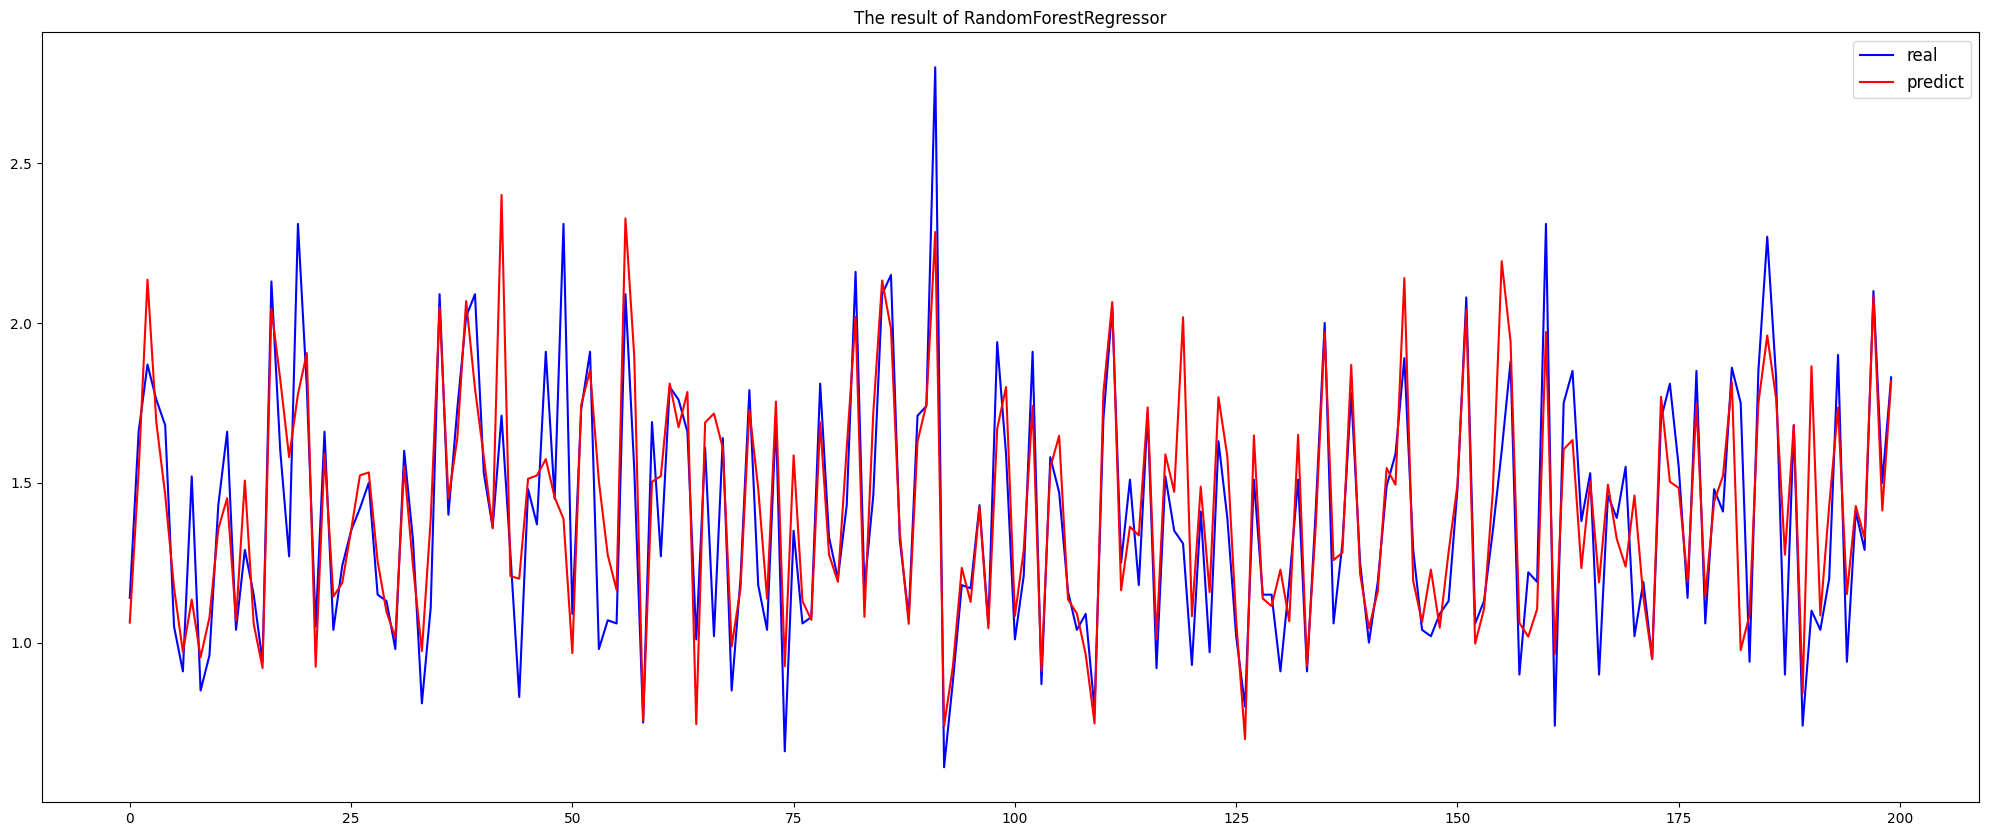

In [406]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(rfr_y_pred[:200],c='red')
plt.annotate(
    # Label and coordinate
    'outlier!',
    xy=(13, 62),
    xytext=(3, 65),
    # Custom arrow
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

#### Train set

In [407]:
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(n_estimators=200)  # maybe parameter tuning
rfr_reg.fit(X_train, y_train)

train_pred = rfr_reg.predict(X_train)


print('Testing set evaluation:\n______')
RandomForestRegressor_Yury_test = print_evaluate(y_test, rfr_y_pred)
print('==*******==')
print('Training set evaluation:\n_____')
RandomForestRegressor_Yury_train = print_evaluate(y_train, train_pred)




Testing set evaluation:
______
MAE: 0.1490996420091324
MSE: 0.04414530170236226
RMSE: 0.21010783351022935
R2 Square 0.7163988422107257
______
==*******==
Training set evaluation:
_____
MAE: 0.05639421875203906
MSE: 0.006413481430643899
RMSE: 0.08008421461588981
R2 Square 0.9608308209281001
______


Text(0.5, 1.0, 'The result of RandomForestRegressor')

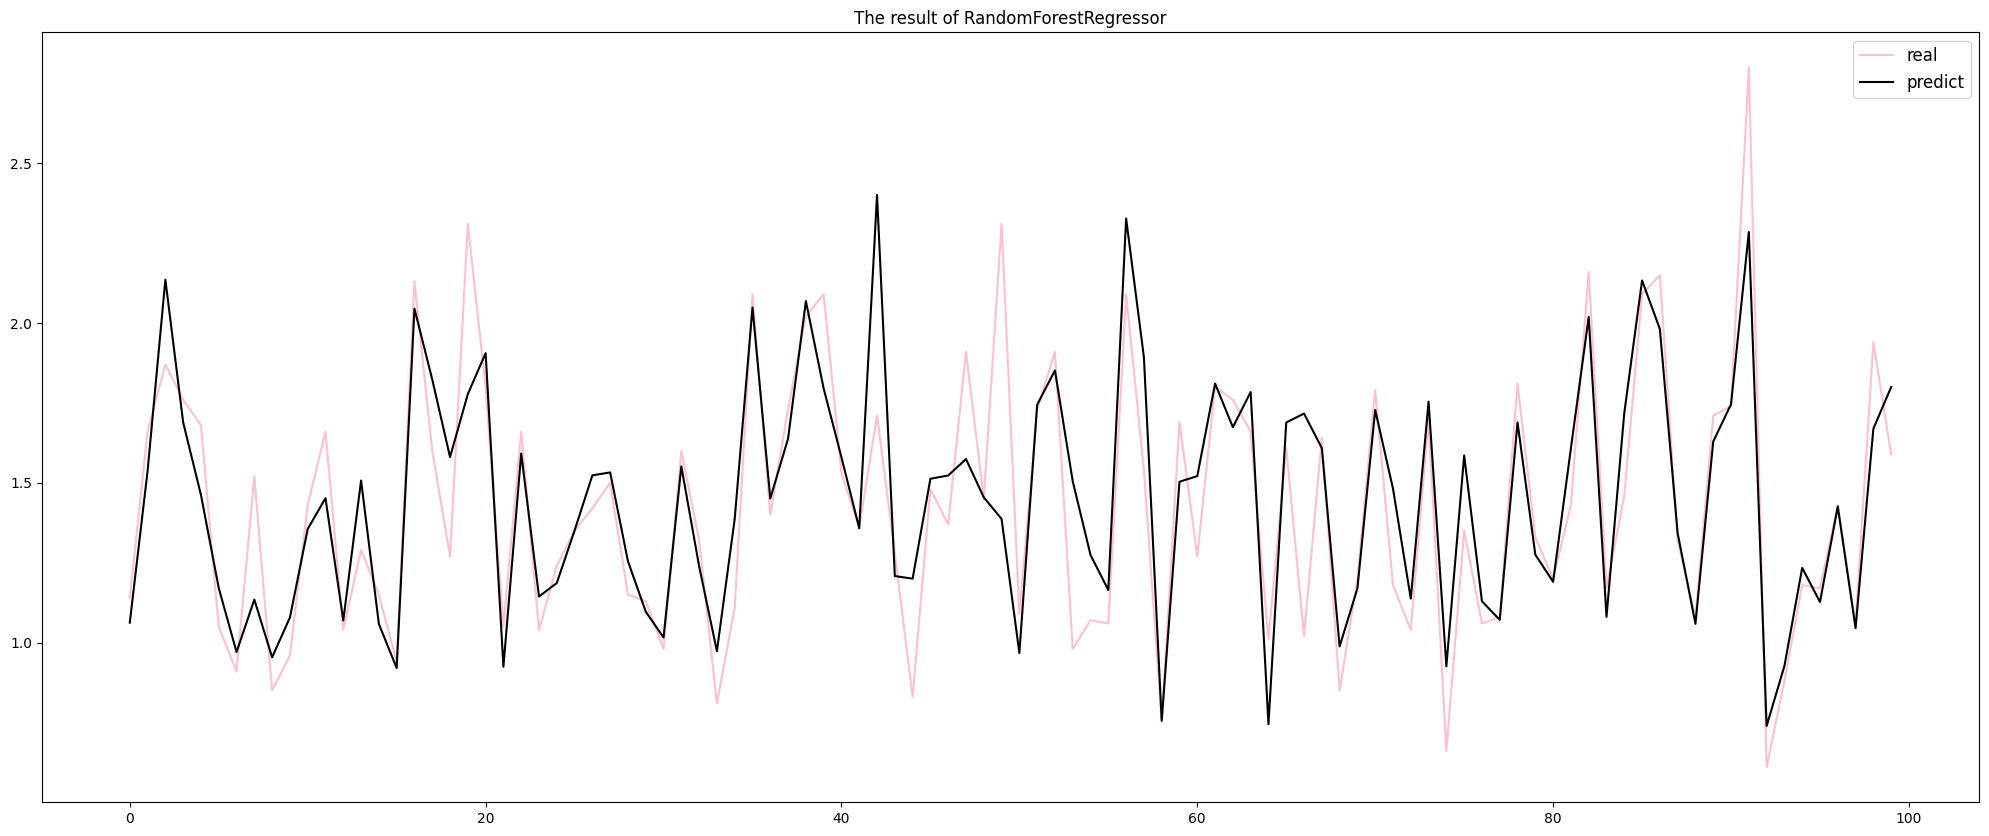

In [408]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='pink')
plt.plot(rfr_y_pred[:100],c='black')  #predicts
plt.annotate(
    # Label and coordinate
    'outlier!',
    xy=(13, 62),
    xytext=(3, 65),
    # Custom arrow
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

## Comparison of results before and after optimizations

* best values of metrics
* MAE -> 0.0
* MSE -> 0.0
* RMSE -> should be less 180
* R2 Square -> 1.0

#### LinearRegression

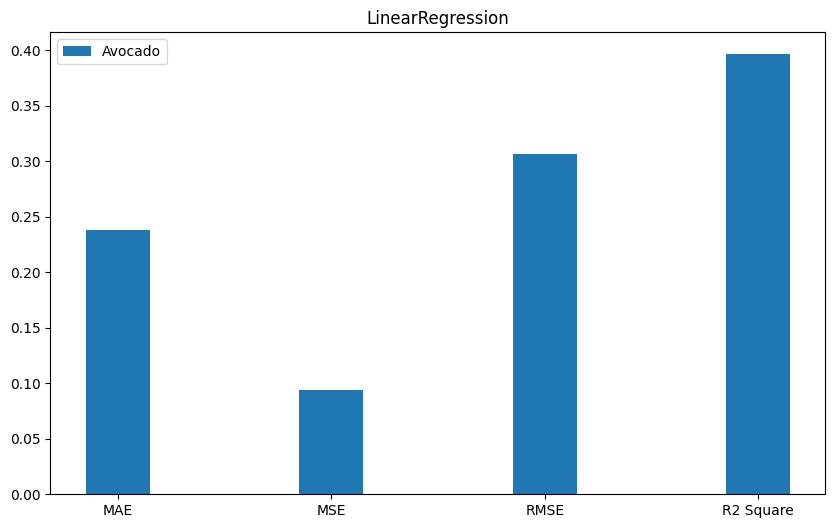

In [409]:
show_df(
    "LinearRegression",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        LinearRegression_Yury
    ]
)

#### GradientBoostingRegressor

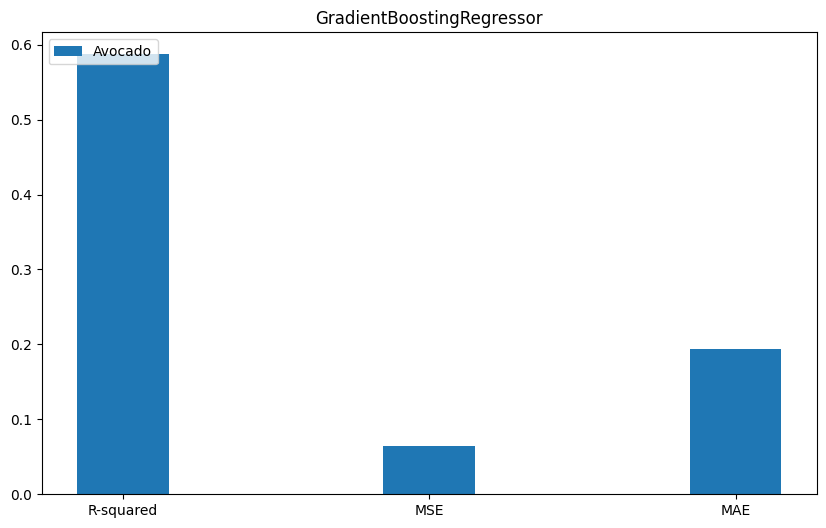

In [410]:
show_df(
    "GradientBoostingRegressor",
    ["R-squared", "MSE", "MAE"],
    [
        GradientBoostingRegressor_Yury
    ]
)

#### RandomForestRegressor - Test set

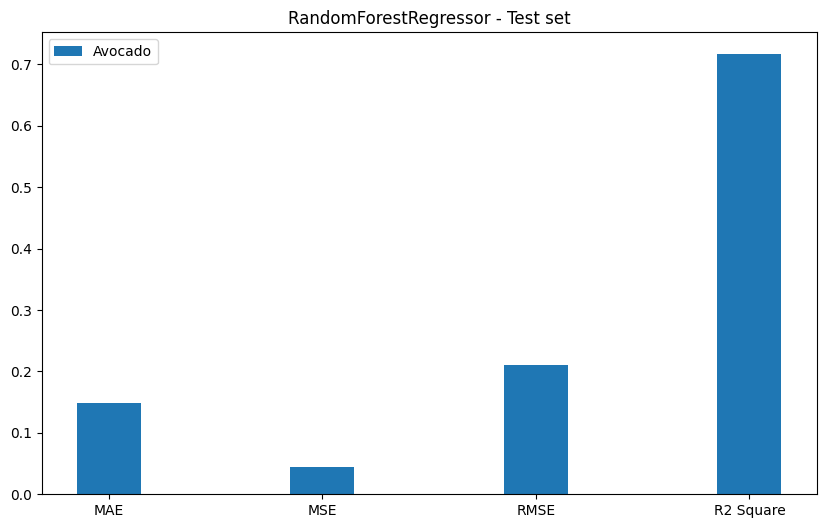

In [411]:
show_df(
    "RandomForestRegressor - Test set",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        RandomForestRegressor_Yury_test
    ]
)

#### RandomForestRegressor - Train set

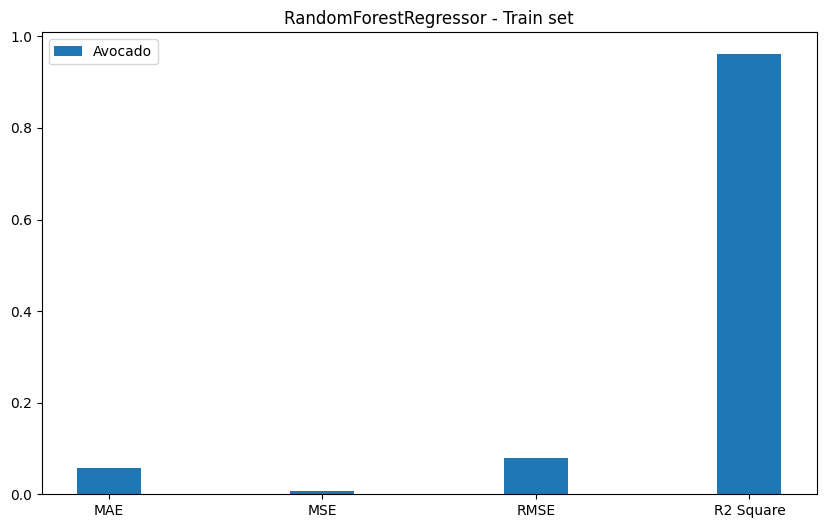

In [412]:
show_df(
    "RandomForestRegressor - Train set",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        RandomForestRegressor_Yury_train
    ]
)